In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv('../data/Iris.csv')

In [3]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
23,24,5.1,3.3,1.7,0.5,Iris-setosa
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
126,127,6.2,2.8,4.8,1.8,Iris-virginica
125,126,7.2,3.2,6.0,1.8,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [34]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Karena data yang telah disediakan sudah bersih dan ready untuk masuk ketahap modelling, hal pertama yang perlu dilakukan adalah transfrom target yang masih dalam bentuk kategorikal string kedalam integer

### saya akan menggunakan label encoder dari sklearn

In [5]:
# namun sebelum itu lebih baik data dibagi antara
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target = df['Species']

In [7]:
X = df[features]

# encode target 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target)

In [11]:
y.shape, y[:5]

((150,), array([0, 0, 0, 0, 0]))

In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
# membagi dataset kedalam training dan testing dengan porsi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = DecisionTreeClassifier()

In [15]:
# fit model dengan training data 
model.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
y_predict = model.predict(X_test)

In [27]:
# kita coba uji hasil model dengan metrix pengujian untuk klasifikasi seperti confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

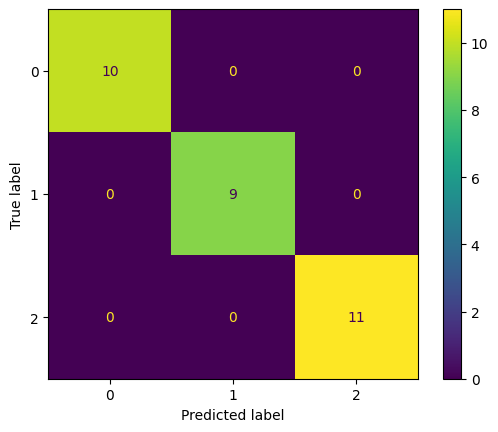

In [21]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

#### dari hasil confusion matrix didapatkan bahwa model dengan sempurna bisa memetakan data testing. Dari ketiga label data tidak ada yang meleset dari hasil prediksi model decision tree

In [33]:
# akurasi score model 
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



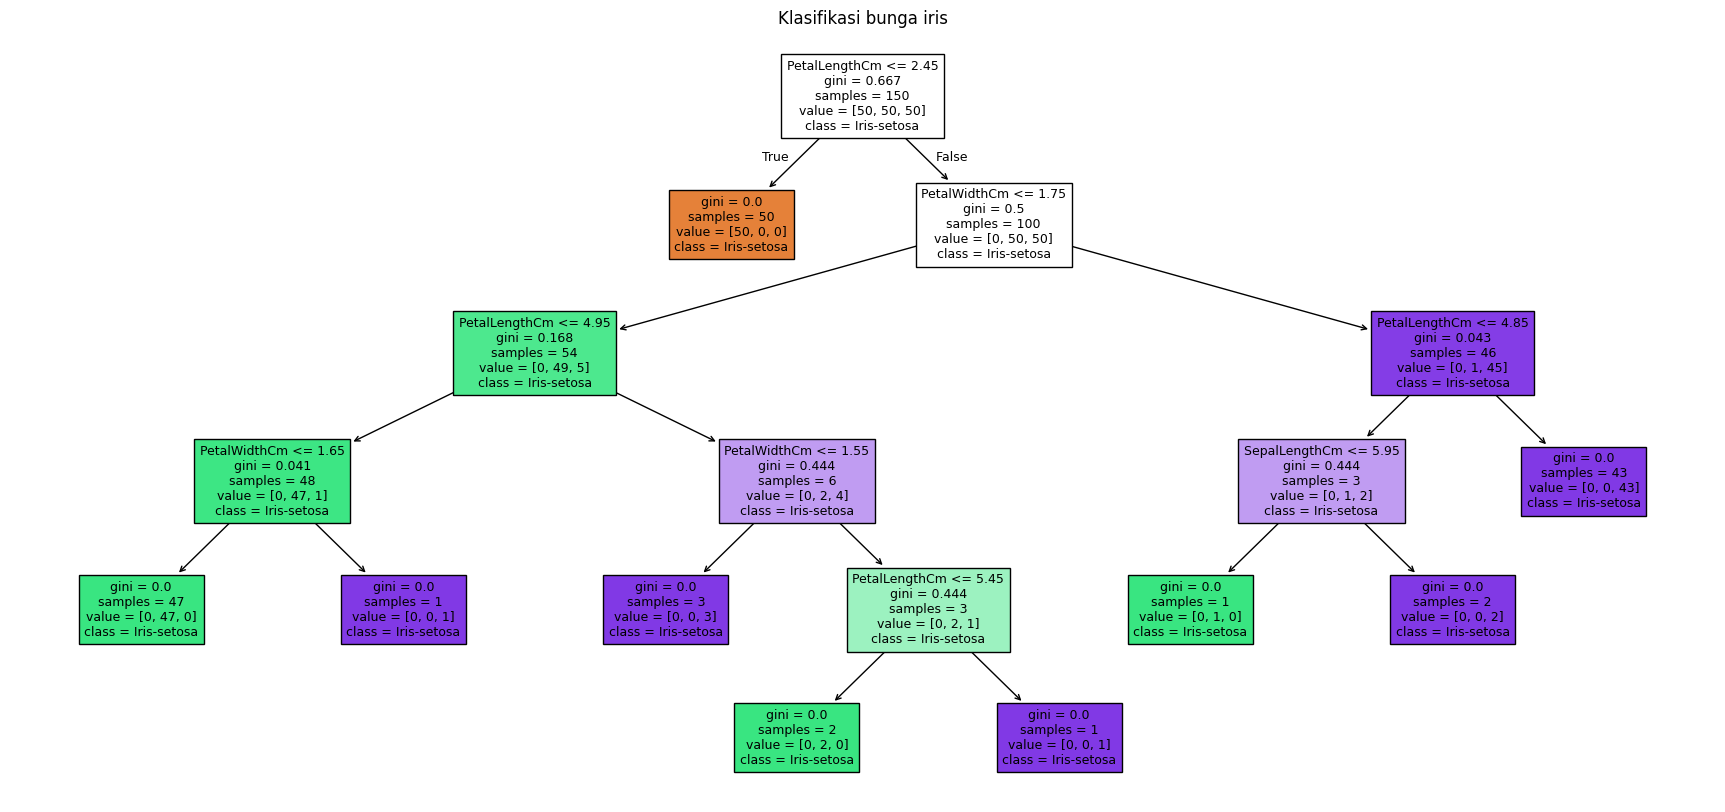

In [24]:
# visualisasi tree atau decision rule yang telah dibangun pada model
plt.figure(figsize=(22, 10))
plot_tree(
    model, 
    feature_names=features,
    class_names=target,
    filled=True,
    fontsize=9
)
plt.title('Klasifikasi bunga iris')
plt.show()